<a href="https://colab.research.google.com/github/YedMavus/ML-Programs/blob/main/India_Covid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!unzip sample_data/India-data.zip


Archive:  sample_data/India-data.zip
  inflating: Latest Covid-19 India Status.csv  


In [5]:
# Installing PySpark:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [6]:
# Installing PySpark:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [7]:
# Installing PySpark:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [14]:
df = spark.read.csv('/content/Latest Covid-19 India Status.csv', inferSchema=True,
                    header=True)
df

State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio
Andaman and Nicobar,7660,11,7520,129,0.14,98.17,1.68
Andhra Pradesh,2067921,3568,2049961,14392,0.17,99.13,0.7
Arunachal Pradesh,55180,60,54840,280,0.11,99.38,0.51
Assam,612134,3379,602729,6026,0.55,98.46,0.98
Bihar,726129,44,716424,9661,0.01,98.66,1.33
Chandigarh,65360,29,64511,820,0.04,98.7,1.25
Chhattisgarh,1006159,259,992316,13584,0.03,98.62,1.35
Dadra and Nagar H...,10682,0,10678,4,0.0,99.96,0.04
Delhi,1440071,351,1414629,25091,0.02,98.23,1.74
Goa,178281,313,174601,3367,0.18,97.94,1.89


In [15]:
from pyspark.sql import functions as F

renamed_df = df.select([F.col(col).alias(col.replace(' ', '_')) for col in df.columns])
renamed_df

State/UTs,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio
Andaman and Nicobar,7660,11,7520,129,0.14,98.17,1.68
Andhra Pradesh,2067921,3568,2049961,14392,0.17,99.13,0.7
Arunachal Pradesh,55180,60,54840,280,0.11,99.38,0.51
Assam,612134,3379,602729,6026,0.55,98.46,0.98
Bihar,726129,44,716424,9661,0.01,98.66,1.33
Chandigarh,65360,29,64511,820,0.04,98.7,1.25
Chhattisgarh,1006159,259,992316,13584,0.03,98.62,1.35
Dadra and Nagar H...,10682,0,10678,4,0.0,99.96,0.04
Delhi,1440071,351,1414629,25091,0.02,98.23,1.74
Goa,178281,313,174601,3367,0.18,97.94,1.89


In [16]:
renamed_df.createOrReplaceTempView('Data')

In [18]:
spark.sql('Select * from Data')

State/UTs,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio
Andaman and Nicobar,7660,11,7520,129,0.14,98.17,1.68
Andhra Pradesh,2067921,3568,2049961,14392,0.17,99.13,0.7
Arunachal Pradesh,55180,60,54840,280,0.11,99.38,0.51
Assam,612134,3379,602729,6026,0.55,98.46,0.98
Bihar,726129,44,716424,9661,0.01,98.66,1.33
Chandigarh,65360,29,64511,820,0.04,98.7,1.25
Chhattisgarh,1006159,259,992316,13584,0.03,98.62,1.35
Dadra and Nagar H...,10682,0,10678,4,0.0,99.96,0.04
Delhi,1440071,351,1414629,25091,0.02,98.23,1.74
Goa,178281,313,174601,3367,0.18,97.94,1.89


In [28]:
renamed_df = renamed_df.withColumnRenamed('State/UTs', 'State_UTs')
renamed_df

State_UTs,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio
Andaman and Nicobar,7660,11,7520,129,0.14,98.17,1.68
Andhra Pradesh,2067921,3568,2049961,14392,0.17,99.13,0.7
Arunachal Pradesh,55180,60,54840,280,0.11,99.38,0.51
Assam,612134,3379,602729,6026,0.55,98.46,0.98
Bihar,726129,44,716424,9661,0.01,98.66,1.33
Chandigarh,65360,29,64511,820,0.04,98.7,1.25
Chhattisgarh,1006159,259,992316,13584,0.03,98.62,1.35
Dadra and Nagar H...,10682,0,10678,4,0.0,99.96,0.04
Delhi,1440071,351,1414629,25091,0.02,98.23,1.74
Goa,178281,313,174601,3367,0.18,97.94,1.89


In [33]:
renamed_df.createOrReplaceTempView('Data')

In [35]:
spark.sql('Select count(State_UTs) from Data')

count(State_UTs)
36


In [36]:
spark.sql('select * from Data order by Active desc limit 5')

State_UTs,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio
Kerala,5008381,73497,4901369,33515,1.47,97.86,0.67
Maharashtra,6616762,18345,6458045,140372,0.28,97.6,2.12
Tamil Nadu,2708230,10588,2661428,36214,0.39,98.27,1.34
Karnataka,2989713,8119,2943487,38107,0.27,98.45,1.27
West Bengal,1597765,8029,1570521,19215,0.5,98.29,1.2


In [37]:
spark.sql('select * from Data order by Death_Ratio desc limit 5')

State_UTs,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio
Punjab,602517,219,585736,16562,0.04,97.21,2.75
Nagaland,31922,188,31045,689,0.59,97.25,2.16
Uttarakhand,343939,146,336392,7401,0.04,97.81,2.15
Maharashtra,6616762,18345,6458045,140372,0.28,97.6,2.12
Goa,178281,313,174601,3367,0.18,97.94,1.89


In [38]:
spark.sql('select sum(Total_Cases), sum(Deaths) from data')

sum(Total_Cases),sum(Deaths)
34355509,460791


In [40]:
spark.sql('select * from Data order by Active asc limit 5 ')

State_UTs,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio
Dadra and Nagar H...,10682,0,10678,4,0.0,99.96,0.04
Lakshadweep,10365,0,10314,51,0.0,99.51,0.49
Andaman and Nicobar,7660,11,7520,129,0.14,98.17,1.68
Chandigarh,65360,29,64511,820,0.04,98.7,1.25
Bihar,726129,44,716424,9661,0.01,98.66,1.33


In [42]:
import pandas as pd

pd_df = renamed_df.toPandas()
pd_df

,State_UTs,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio
0,Andaman and Nicobar,7660,11,7520,129,0.14,98.17,1.68
1,Andhra Pradesh,2067921,3568,2049961,14392,0.17,99.13,0.70
2,Arunachal Pradesh,55180,60,54840,280,0.11,99.38,0.51
3,Assam,612134,3379,602729,6026,0.55,98.46,0.98
4,Bihar,726129,44,716424,9661,0.01,98.66,1.33
5,Chandigarh,65360,29,64511,820,0.04,98.70,1.25
6,Chhattisgarh,1006159,259,992316,13584,0.03,98.62,1.35
7,Dadra and Nagar Haveli and Daman and Diu,10682,0,10678,4,0.00,99.96,0.04
8,Delhi,1440071,351,1414629,25091,0.02,98.23,1.74
9,Goa,178281,313,174601,3367,0.18,97.94,1.89


In [43]:
pd_df.describe()

,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,9.543197e+05,4022.833333,9.374971e+05,12799.750000,0.383889,98.338889,1.275833
std,1.427489e+06,12519.425102,1.396947e+06,24277.800282,0.810866,0.840625,0.563050
min,7.660000e+03,0.000000,7.520000e+03,4.000000,0.000000,94.860000,0.040000
25%,8.438425e+04,103.000000,8.321700e+04,819.000000,0.030000,97.925000,0.955000
50%,4.756905e+05,243.000000,4.646610e+05,5582.000000,0.175000,98.455000,1.315000
75%,1.015407e+06,3055.000000,1.002200e+06,13786.000000,0.457500,98.712500,1.590000
max,6.616762e+06,73497.000000,6.458045e+06,140372.000000,4.790000,99.960000,2.750000


In [44]:
pd_df.corr()

,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio
Total_Cases,1.000000,0.696048,0.999987,0.899861,0.031925,-0.084541,0.079404
Active,0.696048,1.000000,0.695467,0.393385,0.293340,-0.175170,-0.160638
Discharged,0.999987,0.695467,1.000000,0.898630,0.030793,-0.082399,0.077826
Deaths,0.899861,0.393385,0.898630,1.000000,-0.045948,-0.139322,0.273542
Active_Ratio,0.031925,0.293340,0.030793,-0.045948,1.000000,-0.768105,-0.289715
Discharge_Ratio,-0.084541,-0.175170,-0.082399,-0.139322,-0.768105,1.000000,-0.390298
Death_Ratio,0.079404,-0.160638,0.077826,0.273542,-0.289715,-0.390298,1.000000


In [45]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=['Total Cases', 'Deaths', 'Active', 'Discharged'])

total_cases = go.Histogram(x=pd_df['Total_Cases'], nbinsx=20, name='Total Cases')
deaths = go.Histogram(x=pd_df['Deaths'], nbinsx=20, name='Deaths')
active = go.Histogram(x=pd_df['Active'], nbinsx=20, name='Active')
discharged = go.Histogram(x=pd_df['Discharged'], nbinsx=20, name='Discharged')

fig.add_trace(total_cases, 1, 1)
fig.add_trace(deaths, 1, 2)
fig.add_trace(active, 2, 1)
fig.add_trace(discharged, 2, 2)

fig.update_layout(showlegend=False)
fig.show()

In [46]:
fig = make_subplots(rows=2, cols=2, subplot_titles=['Total Cases', 'Deaths', 'Active', 'Discharged'])

total_cases = go.Box(x=pd_df['Total_Cases'], name='Total Cases', text=pd_df['State_UTs'])
deaths = go.Box(x=pd_df['Deaths'], name='Deaths', text=pd_df['State_UTs'])
active = go.Box(x=pd_df['Active'], name='Active', text=pd_df['State_UTs'])
discharged = go.Box(x=pd_df['Discharged'], name='Discharged', text=pd_df['State_UTs'])

fig.add_trace(total_cases, 1, 1)
fig.add_trace(deaths, 1, 2)
fig.add_trace(active, 2, 1)
fig.add_trace(discharged, 2, 2)

fig.update_layout(showlegend=False)
fig.show()

In [47]:
fig = make_subplots(rows=2, cols=2, subplot_titles=['Total Cases', 'Deaths', 'Active', 'Discharged'])

total_cases = go.Bar(y=pd_df['Total_Cases'], name='Total Cases', hovertext=pd_df['State_UTs'])
deaths = go.Bar(y=pd_df['Deaths'], name='Deaths', hovertext=pd_df['State_UTs'])
active = go.Bar(y=pd_df['Active'], name='Active', hovertext=pd_df['State_UTs'])
discharged = go.Bar(y=pd_df['Discharged'], name='Discharged', hovertext=pd_df['State_UTs'])

fig.add_trace(total_cases, 1, 1)
fig.add_trace(deaths, 1, 2)
fig.add_trace(active, 2, 1)
fig.add_trace(discharged, 2, 2)

fig.update_layout(showlegend=False)
fig.show()

In [48]:
fig = go.Figure([go.Bar(y=pd_df['Total_Cases'], name='Total Cases', hovertext=pd_df['State_UTs'], x=pd_df['State_UTs']),
                 go.Bar(y=pd_df['Discharged'], name='Discharged', hovertext=pd_df['State_UTs'], x=pd_df['State_UTs'])])
fig.update_layout(barmode='group')
fig.update_layout(title='Total & Discharged Cases')
fig.show()

In [49]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['Total Cases', 'Deaths', 'Active', 'Discharged'],
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}]])

total_cases = go.Pie(values=pd_df['Total_Cases'], name='Total Cases', labels=pd_df['State_UTs'])
deaths = go.Pie(values=pd_df['Deaths'], name='Deaths', labels=pd_df['State_UTs'])
active = go.Pie(values=pd_df['Active'], name='Active', labels=pd_df['State_UTs'])
discharged = go.Pie(values=pd_df['Discharged'], name='Discharged', labels=pd_df['State_UTs'])

fig.add_trace(total_cases, 1, 1)
fig.add_trace(deaths, 1, 2)
fig.add_trace(active, 2, 1)
fig.add_trace(discharged, 2, 2)

fig.update_traces(hoverinfo='percent+label')
fig.update_layout(showlegend=False)

fig.update_traces(textposition='inside')

fig = go.Figure(fig)
fig.show()

In [50]:
fig = go.Figure([go.Scatter(x=pd_df['Total_Cases'], y=pd_df['Deaths'], mode='markers', text=pd_df['State_UTs'])])
fig.update_layout(title='Deaths vs Total Cases', xaxis_title='Total Cases', yaxis_title='Deaths')
fig.show()

In [53]:
X = pd_df['Total_Cases'].to_numpy()
y = pd_df['Deaths'].to_numpy()
X.shape , y.shape

((36,), (36,))

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.reshape((len(X),1)),y)
(model.intercept_,model.coef_[0])

(-1805.390125967826, 0.015304242604434757)

In [57]:
model.score(X.reshape((len(X),1)),y)

0.8097494925931461

In [63]:
predictions = model.predict(X.reshape((len(X),1)))
predictions.shape
predictions

array([-1.68815963e+03,  2.98425745e+04, -9.60902019e+02,  7.56285712e+03,
        9.30746425e+03, -8.05104829e+02,  1.35931113e+04, -1.64191021e+03,
        2.02338058e+04,  9.23065550e+02,  1.08468721e+04,  9.99889463e+03,
        1.63546274e+03,  3.28956058e+03,  3.53370917e+03,  4.39499029e+04,
        7.48440878e+04, -1.48390921e+03, -1.64676165e+03,  1.03293591e+04,
        9.94591408e+04,  9.30552564e+01, -5.22481381e+02,  1.07517766e+02,
       -1.31684809e+03,  1.41592459e+04,  1.56078127e+02,  7.41567622e+03,
        1.28017595e+04, -1.31505750e+03,  3.96420188e+04,  8.48467756e+03,
       -5.11110329e+02,  2.43678184e+04,  3.45833577e+03,  2.26471931e+04])

In [66]:
fig = go.Figure([go.Scatter(x=pd_df['Total_Cases'], y=pd_df['Deaths'], mode='markers', text=pd_df['State_UTs'], name='Actual Deaths'),
                 go.Scatter(x=pd_df['Total_Cases'], y=predictions, name='Predicted Deaths')])
fig.update_layout(title='Deaths vs Total Cases', xaxis_title='Total Cases', yaxis_title='Deaths')
fig.show()

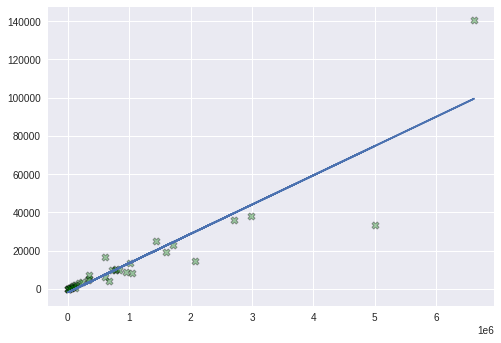

In [78]:
#Same thing but with MatPlotLib
from matplotlib import pyplot as plt
plt.style.use('seaborn')
plt.scatter(X,y, c = 'green',marker = 'X', edgecolor = 'black', linewidth = 1, alpha = 0.34)
plt.plot(X, predictions)